note: needs to be run with lower python because librosa doesn't work with 3.9

In [1]:
import re, sys
from pliers.extractors import RMSExtractor
from scipy import signal
from scipy.io import wavfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.version

'3.7.9 (default, Aug 31 2020, 07:22:35) \n[Clang 10.0.0 ]'

In [2]:
audio_file = '/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/narratives_itsnotthefall/data_itsnotthefall/01_audio_text/itsnotthefall.wav'

samplerate, wavdata = wavfile.read(audio_file)


In [3]:
wavdata.shape

(25659011, 2)

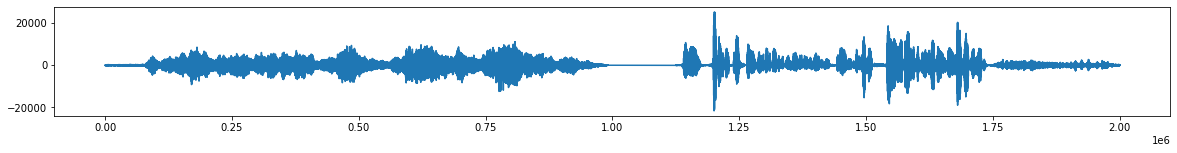

In [4]:
plt.figure(figsize = (20,2))
plt.plot(wavdata[:2000000,0]);
plt.show()

In [5]:
# Create an instance of this extractor
ext = RMSExtractor(frame_length=2048)

# Extract features from the audio stimulus
rms_result = ext.transform(audio_file)
rms_result_df = rms_result.to_df()
rms_result_df.tail()

,order,duration,onset,object_id,rms
50111,50111,0.01161,581.787574,0,0.0
50112,50112,0.01161,581.799184,0,0.0
50113,50113,0.01161,581.810794,0,0.0
50114,50114,0.01161,581.822404,0,0.0
50115,50115,0.01161,581.834014,0,0.0


In [7]:
samplerate

44100

In [10]:
wavdata.shape[0]/samplerate  
#581.8 seconds


581.8369841269841

In [12]:
# TR is 1.5 -> how many TRs have we got?
tr = 1.5
(wavdata.shape[0]/samplerate )/tr  #answer: 388 - and that's to what the fMRI data have been cut to 
#(also see the data descriptor paper for details on the amount of silence etc. before/after the actual story)

387.8913227513228

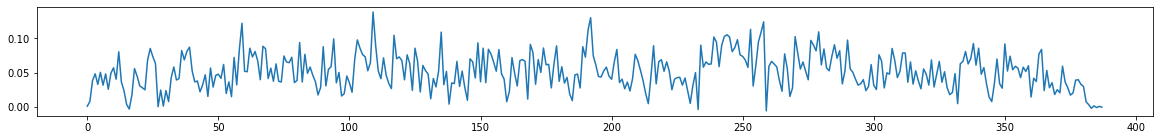

In [13]:
resampled_audio_feature = signal.resample(rms_result_df['rms'], 388) 
# down to 388 volumes

plt.figure(figsize = (20,2))
plt.plot(resampled_audio_feature);


In [14]:
np.save('../data_itsnotthefall/resampled_audio_feature_388trs.npy', resampled_audio_feature)